In [1]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.table import Table
from astropy.io import fits
from astropy import wcs
import seaborn as sns

/cm/shared/apps/python/intel/intelpython3/3.5.3/envs/jupyterhub/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


This notebook uses all the raw data from the XID+MIPS catalogue, maps, PSF and relevant MOCs to create XID+ prior object and relevant tiling scheme

## Read in MOCs
The selection functions required are the main MOC associated with the masterlist. As the prior for XID+ is based on IRAC detected sources coming from two different surveys at different depths (SPUDS and SWIRE) I will split the XID+ run into two different runs. Here we use the SPUDS depth.

In [2]:
Sel_func=pymoc.MOC()
Sel_func.read('../../dmu4/dmu4_sm_XMM-LSS/data/holes_XMM-LSS_irac1_O16_20180420_MOC.fits')

## Read in XID+MIPS catalogue

In [3]:
XID_MIPS=Table.read('../dmu26_XID+MIPS_XMM-LSS/data/dmu26_XID+MIPS_XMM-LSS_SPUDS_cat_20181210.fits')

In [4]:
XID_MIPS[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool
HELP_J021748.384-055853.332,34.4515999475648,-5.9814811582976155,305.31146,323.17114,287.40622,-0.007987332,5.0641715e-06,1.0000608,1343.0,0.0,False
HELP_J021747.552-055909.435,34.4481319475648,-5.985954158297615,61.64442,83.24991,39.762577,-0.007987332,5.0641715e-06,1.0007377,1146.0,0.0,False
HELP_J021751.319-055843.666,34.4638289475648,-5.978796158297614,40.07564,60.321735,21.23005,-0.011716769,5.1117663e-06,0.99953556,2000.0,0.0,False
HELP_J021751.808-055827.121,34.465864947564796,-5.974200158297615,14.507545,27.912325,4.470504,-0.011716769,5.1117663e-06,1.0026258,2000.0,0.0,False
HELP_J021752.105-055836.873,34.4671040222776,-5.97690909477323,329.24072,347.7774,309.96005,-0.011716769,5.1117663e-06,nan,2000.0,0.0,False
HELP_J021756.415-055812.803,34.4850609475648,-5.970223158297616,68.94973,96.15068,39.50831,-0.011716769,5.1117663e-06,1.0022622,865.0,0.0,False
HELP_J021755.590-055800.544,34.4816249822776,-5.96681790477323,256.0221,272.37762,240.00948,-0.011716769,5.1117663e-06,nan,2000.0,0.0,False
HELP_J021754.691-055807.994,34.4778793322776,-5.96888729477323,87.04866,103.543526,70.45882,-0.011716769,5.1117663e-06,1.0004507,2000.0,0.0,False


4.9990315
5940


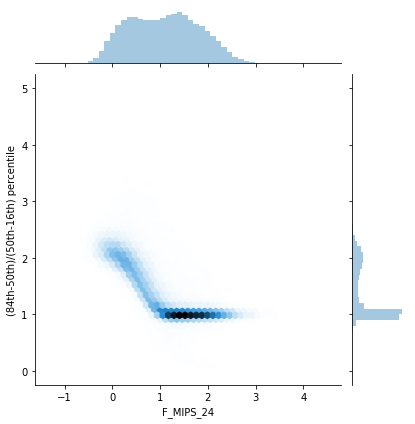

In [5]:
skew=(XID_MIPS['FErr_MIPS_24_u']-XID_MIPS['F_MIPS_24'])/(XID_MIPS['F_MIPS_24']-XID_MIPS['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5 
n_use=skew>5
g=sns.jointplot(x=np.log10(XID_MIPS['F_MIPS_24'][use]),y=skew[use] ,kind='hex')
print(np.max(skew[use]))
print(len(skew[n_use]))


The uncertianties become Gaussian by $\sim 10 \mathrm{\mu Jy}$

In [6]:
good=XID_MIPS['F_MIPS_24']>10

In [7]:
good.sum()

73011

## Read in Maps

In [8]:
im100fits='../../dmu18/dmu18_XMM-LSS/data/input_data/XMM-LSS_PACS100_v0.9.fits'#PACS 100 map
im160fits='../../dmu18/dmu18_XMM-LSS/data/input_data/XMM-LSS_PACS160_v0.9.fits'#PACS 160 map

#output folder
output_folder='./'

In [9]:
hdulist = fits.open(im100fits)
hdulist.info()

Filename: ../../dmu18/dmu18_XMM-LSS/data/input_data/XMM-LSS_PACS100_v0.9.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      88   ()      
  1  IMAGE         1 ImageHDU        28   (10297, 10339)   float32   
  2  ERROR         1 ImageHDU        28   (10297, 10339)   float32   
  3  COVERAGE      1 ImageHDU         9   ()      
  4  PSF           1 ImageHDU         9   ()      


In [10]:
from astropy.io import fits
from astropy import wcs

#-----100-------------
hdulist = fits.open(im100fits)
im100phdu=hdulist['PRIMARY'].header
im100hdu=hdulist['IMAGE'].header
im100=hdulist['IMAGE'].data
w_100 = wcs.WCS(hdulist['IMAGE'].header)
pixsize100=3600.0*np.abs(hdulist['IMAGE'].header['CDELT1']) #pixel size (in arcseconds)
nim100=hdulist['ERROR'].data

hdulist.close()

#-----160-------------
hdulist = fits.open(im160fits)
im160phdu=hdulist['PRIMARY'].header
im160hdu=hdulist['IMAGE'].header
im160=hdulist['IMAGE'].data
w_160 = wcs.WCS(hdulist['IMAGE'].header)
pixsize160=3600.0*np.abs(hdulist['IMAGE'].header['CDELT1']) #pixel size (in arcseconds)
nim160=hdulist['ERROR'].data


hdulist.close()

In [11]:
#import pylab as plt
#plt.hist(im160.flatten(),bins=np.arange(-0.1,0.10,0.005));
#plt.yscale('log')

In [12]:
#XID_PACS=Table.read('./data/SPUDS_test/dmu26_XID+PACS_XMM-LSS_SPUDS_cat.fits')

In [13]:
#XID_PACS[0:10]

## Read in PSF

In [15]:
pacs100_psf=fits.open('../../dmu18/dmu18_XMM-LSS/dmu18_PACS_100_PSF_XMM-LSS_20190125_sr.fits')
pacs160_psf=fits.open('../../dmu18/dmu18_XMM-LSS/dmu18_PACS_160_PSF_XMM-LSS_20190125_sr.fits')

pacs100_psf.info()



Filename: ../../dmu18/dmu18_XMM-LSS/dmu18_PACS_100_PSF_XMM-LSS_20190125_sr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      88   ()      
  1  IMAGE         1 ImageHDU        42   (301, 301)   float32   
  2  error         1 ImageHDU        42   (301, 301)   float32   


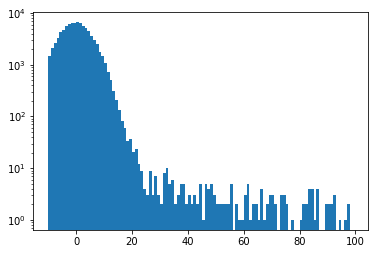

In [20]:
import pylab as plt
dat=pacs100_psf[1].data
plt.hist(dat.flatten(),bins=np.arange(-10.0,100.0,1.0));
plt.yscale('log')

In [21]:
centre100=np.long((pacs100_psf[1].header['NAXIS1']-1)/2)
radius100=15
centre160=np.long((pacs160_psf[1].header['NAXIS1']-1)/2)
radius160=15

pind100=np.arange(0,radius100+1+radius100,1)*3600*np.abs(pacs100_psf[1].header['CDELT1'])/pixsize100 #get 100 scale in terms of pixel scale of map
pind160=np.arange(0,radius160+1+radius160,1)*3600*np.abs(pacs160_psf[1].header['CDELT1'])/pixsize160 #get 160 scale in terms of pixel scale of map




In [22]:
print(pind100)

[ 0.          0.33333333  0.66666667  1.          1.33333333  1.66666667
  2.          2.33333333  2.66666667  3.          3.33333333  3.66666667
  4.          4.33333333  4.66666667  5.          5.33333333  5.66666667
  6.          6.33333333  6.66666667  7.          7.33333333  7.66666667
  8.          8.33333333  8.66666667  9.          9.33333333  9.66666667
 10.        ]


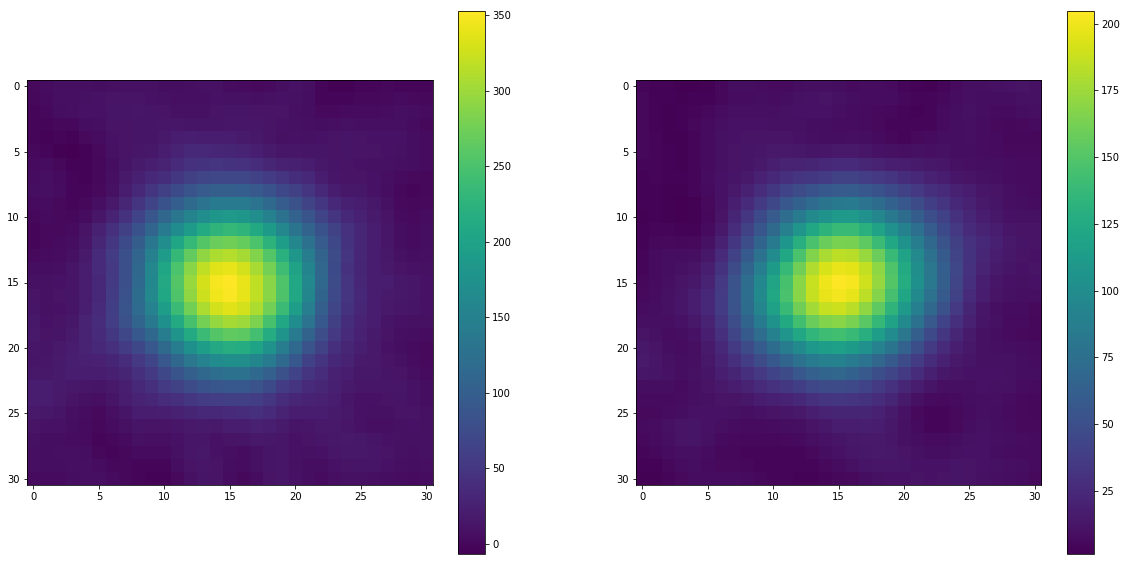

In [23]:
import pylab as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(pacs100_psf[1].data[centre100-radius100:centre100+radius100+1,centre100-radius100:centre100+radius100+1])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(pacs160_psf[1].data[centre160-radius160:centre160+radius160+1,centre160-radius160:centre160+radius160+1])
plt.colorbar()


## Set XID+ prior class

In [24]:
#---prior100--------
prior100=xidplus.prior(im100,nim100,im100phdu,im100hdu, moc=Sel_func)#Initialise with map, uncertianty map, wcs info and primary header
prior100.prior_cat(XID_MIPS['RA'][good],XID_MIPS['Dec'][good],'dmu26_XID+MIPS_XMM-LSS_SPUDS_cat_20181210',ID=XID_MIPS['help_id'][good])#Set input catalogue
prior100.prior_bkg(0.0,5)#Set prior on background (assumes Gaussian pdf with mu and sigma)

#---prior160--------
prior160=xidplus.prior(im160,nim160,im160phdu,im160hdu, moc=Sel_func)
prior160.prior_cat(XID_MIPS['RA'][good],XID_MIPS['Dec'][good],'dmu26_XID+MIPS_XMM-LSS_SPUDS_cat_20181210.fits',ID=XID_MIPS['help_id'][good])
prior160.prior_bkg(0.0,5)


In [25]:
# Divide by 1000 so that units are mJy
prior100.set_prf(pacs100_psf[1].data[centre100-radius100:centre100+radius100+1,centre100-radius100:centre100+radius100+1]/1000.0,
                pind100,pind100)
prior160.set_prf(pacs160_psf[1].data[centre160-radius160:centre160+radius160+1,centre160-radius160:centre160+radius160+1]/1000.0,
                pind160,pind160)

In [26]:
import pickle
#from moc, get healpix pixels at a given order
from xidplus import moc_routines
order=11
tiles=moc_routines.get_HEALPix_pixels(order,prior100.sra,prior100.sdec,unique=True)
order_large=6
tiles_large=moc_routines.get_HEALPix_pixels(order_large,prior100.sra,prior100.sdec,unique=True)
print('----- There are '+str(len(tiles))+' tiles required for input catalogue and '+str(len(tiles_large))+' large tiles')
output_folder='./data/SPUDS/'
outfile=output_folder+'Master_prior_SPUDS.pkl'
with open(outfile, 'wb') as f:
    pickle.dump({'priors':[prior100,prior160],'tiles':tiles,'order':order,'version':xidplus.io.git_version()},f)
outfile=output_folder+'Tiles_SPUDS.pkl'
with open(outfile, 'wb') as f:
    pickle.dump({'tiles':tiles,'order':order,'tiles_large':tiles_large,'order_large':order_large,'version':xidplus.io.git_version()},f)
raise SystemExit()

----- There are 1728 tiles required for input catalogue and 6 large tiles


SystemExit: 